# Linear Regression Model

LRG Model has 2 parameters: weight and bias. **This is adjusted as it is trained**

 **Forward Pass based on existing dataset**

``` python
y_pred = LRM_model(X_trainset)
```

**Trained model's prediction. No existing dataset**
``` python
with torch.inference_mode():
  y_pred = LRM_model(X_testset)
```



Training Information | Epoch: 0 | Loss: 449.30841064453125
Training Information | Epoch: 1000 | Loss: 3.3771893978118896
Training Information | Epoch: 2000 | Loss: 2.5077030658721924
Training Information | Epoch: 3000 | Loss: 1.8620750904083252
Training Information | Epoch: 4000 | Loss: 1.3826698064804077
Training done with 5000 epochs.
Weight: Parameter containing:
tensor([2.1905], requires_grad=True) | Bias: Parameter containing:
tensor([0.9745], requires_grad=True)


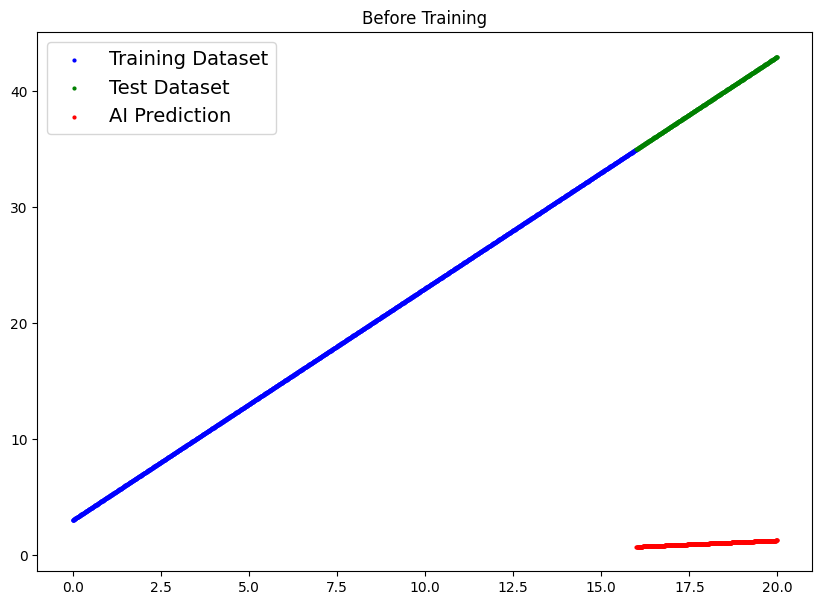

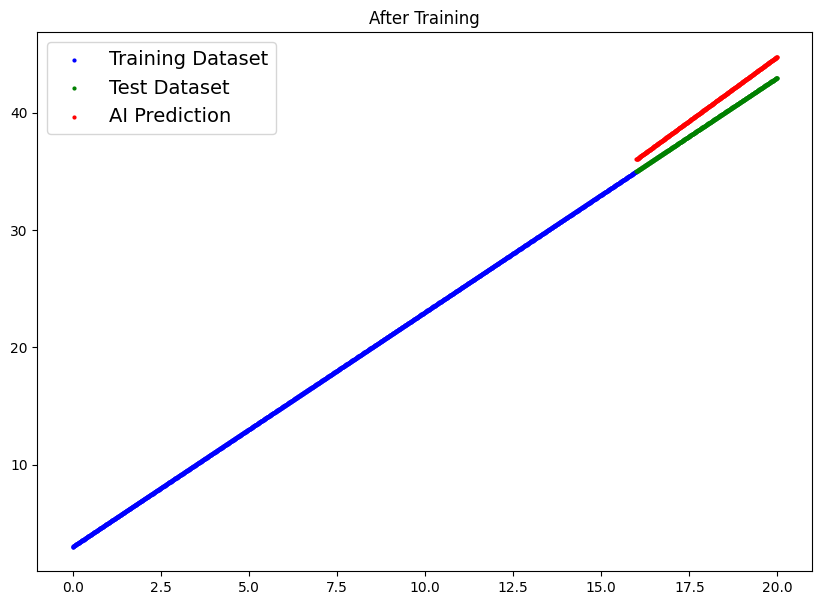

In [1]:
import torch
import matplotlib.pyplot as plt
from torch import nn

# Create Dataset. y=2x+3
weight = 2
bias = 3
X = torch.arange(0,20, 0.01)
y = 2*X+3

# Split X into training and test set
X_train = X[:int(len(X)*0.8)]
X_test = X[int(len(X)*0.8):]
y_train = y[:int(len(y)*0.8)]
y_test = y[int(len(y)*0.8):]

# Create a model
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, requires_grad = True))
    self.bias = nn.Parameter(torch.randn(1, requires_grad=True))

  def forward(self, x:torch.tensor) -> torch.tensor:
    return self.weights * x + self.bias

LRG_model = LinearRegressionModel()

# Plotting Procedure
def plot(trainset_x = X_train, trainset_y = y_train, testset_x=X_test, testset_y=y_test, prediction=None, title=""):
  plt.figure(figsize=(10,7))
  plt.scatter(trainset_x, trainset_y, s=4, c="b", label = "Training Dataset")
  plt.scatter(testset_x, testset_y, s=4, c="g", label = "Test Dataset")
  if prediction is not None:
    plt.scatter(testset_x, prediction, s=4, c="r", label = "AI Prediction")
  plt.legend(prop={"size": 14})
  plt.title(title)

# Prediction before training
with torch.inference_mode():
  y_pred = LRG_model(X_test)
plot(prediction = y_pred, title = "Before Training")

# Training
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(LRG_model.parameters(), lr=0.0003)
epochs = 5000
for epoch in range(epochs):
  y_tpred = LRG_model(X_train)
  loss = loss_fn(y_tpred, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  if epoch%1000==0:
    print(f"Training Information | Epoch: {epoch} | Loss: {loss}")

print(f"Training done with {epochs} epochs.")
print(f"Weight: {LRG_model.weights} | Bias: {LRG_model.bias}")
with torch.inference_mode():
  y_tpred = LRG_model(X_test)
plot(prediction = y_tpred, title = "After Training")